In [1]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm

In [5]:
df1 = pd.read_csv("./data/friction.txt", sep='\s+',comment="#",header=None)
df2 = pd.read_csv("./data/friction_avecorrelate_averunning.txt", sep='\s+',comment="#",skiprows=1001004, header=None)


In [7]:
df1.head()

,0,1,2,3
0,0,-0.310044,0.196996,0.028847
1,1,-0.301172,0.188706,0.030235
2,2,-0.291815,0.179524,0.031702
3,3,-0.281934,0.169407,0.033247
4,4,-0.271512,0.158327,0.034862


In [8]:
df2.head()

,0,1,2,3,4,5
0,1,0,1000001,0.668451,0.678086,0.002740
1,2,2,1000000,0.667768,0.677401,0.002738
2,3,4,999999,0.665728,0.675357,0.002730
3,4,6,999998,0.662352,0.671973,0.002716
4,5,8,999997,0.657676,0.667286,0.002698


In [17]:
acf1 = sm.tsa.stattools.acovf(df1.loc[:,3], nlag=2000)

In [18]:
acf1

array([2.74045461e-03, 2.73977399e-03, 2.73773482e-03, ...,
       2.45988641e-05, 2.48072171e-05, 2.50107586e-05])

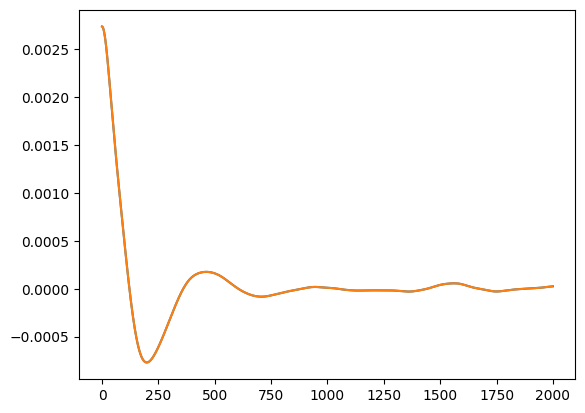

In [25]:
plt.plot(acf1)
plt.plot(df2.loc[:,1], df2.loc[:,5])

可以看出lammps的fix ave/correlate求出的数值与使用statsmodels包及原始数据算出的acf是一致的！以后可以直接求原始数据，然后后处理得到acf!

In [26]:
from scipy.integrate import simpson, trapezoid
simpson(df2.loc[:,5],df2.loc[:,1])

0.07982413324675999

In [27]:
simpson(acf1)

0.07987806218647703

In [28]:
trapezoid(df2.loc[:,5],df2.loc[:,1])

0.07982465689676001

In [29]:
trapezoid(acf1)

0.07987807896931672